In [6]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('content/drive/MyDrive/Titanic Survival/Titanic-Dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Import Important Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import accuracy_score ,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Load data

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Titanic Survival/Titanic-Dataset.csv')


# Explore data
    

In [10]:
df.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
df.shape


(891, 12)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.duplicated().sum()


0

In [15]:
null_d=df.isnull().sum()
null_d[null_d>0]

,0
Age,177
Cabin,687
Embarked,2


<Axes: >

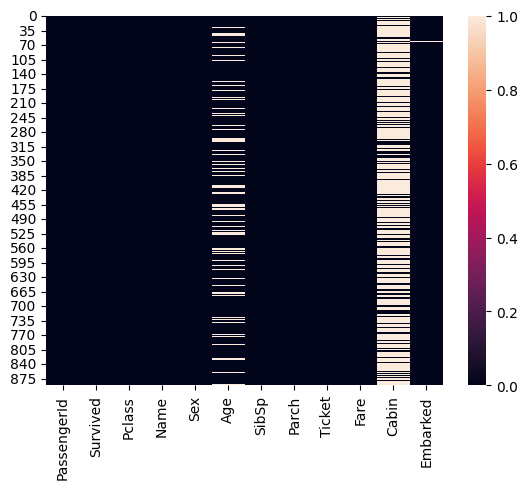

In [16]:
sns.heatmap(df.isnull())


<Axes: >

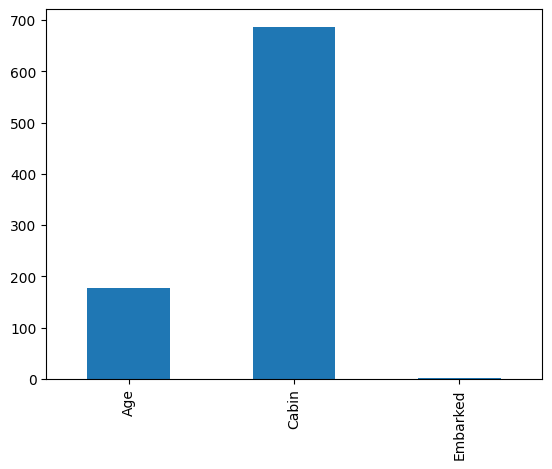

In [17]:
null_d[null_d>0].plot(kind='bar')


# Data Cleaning


In [18]:
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Fare'],axis =1 , inplace=True )

In [19]:
df.Age=df.Age.fillna(df.Age.mean())


In [20]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0


<Axes: >

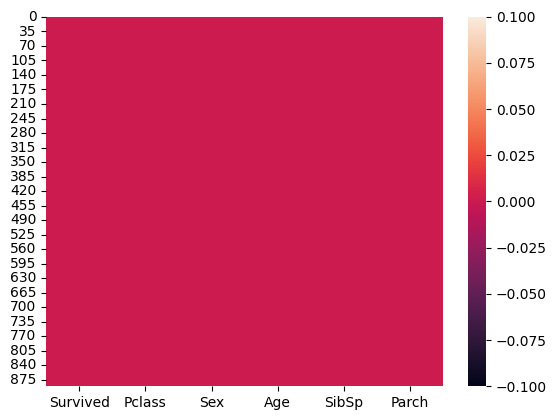

In [21]:
sns.heatmap(df.isnull())


# Data Analysis

---



<Axes: >

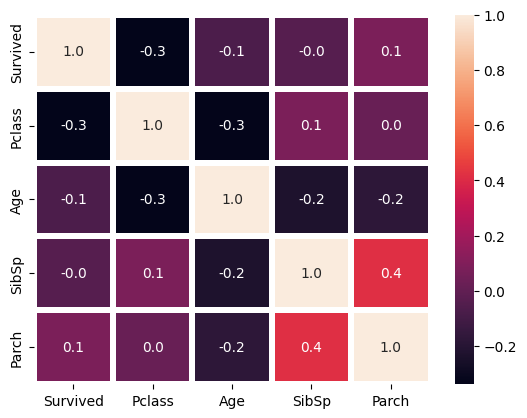

In [22]:
num_cols = df.select_dtypes(include='number').columns

corr_matrix = df[num_cols].corr()
corr_matrix

sns.heatmap(corr_matrix,annot=True,fmt='.1f',linewidths=4)

In [23]:
df.Survived.value_counts()


,count
Survived,
0,549
1,342


In [24]:
df.Sex.value_counts()


,count
Sex,
male,577
female,314


<Axes: xlabel='Survived', ylabel='count'>

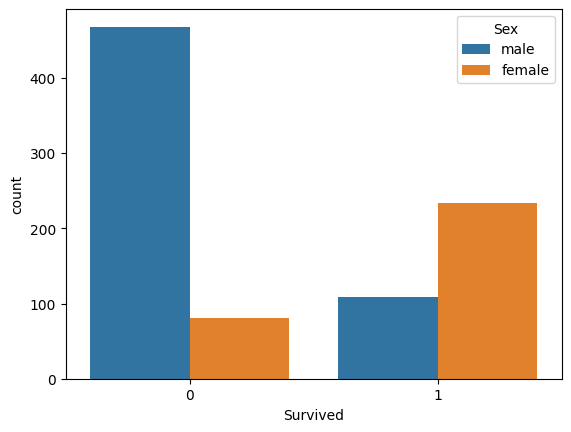

In [25]:
sns.countplot(x='Survived',data=df,hue='Sex')


In [26]:
df.Survived.groupby(df.Pclass).value_counts()


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

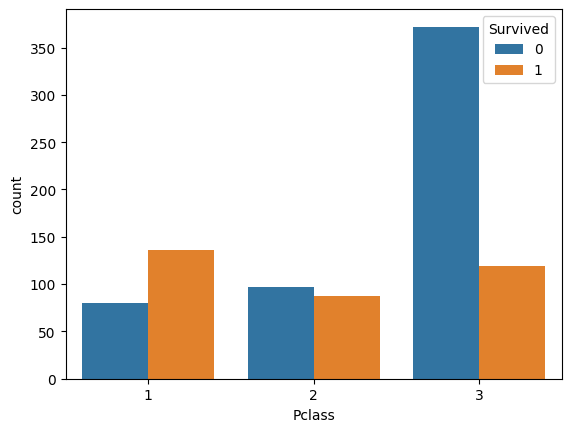

In [27]:
sns.countplot(x='Pclass',data=df,hue='Survived')


In [28]:
age=df.Age.groupby(df.Survived).value_counts()
age

Survived  Age      
0         29.699118    125
          21.000000     19
          28.000000     18
          25.000000     17
          18.000000     17
                      ... 
1         0.420000       1
          0.670000       1
          0.920000       1
          7.000000       1
          80.000000      1
Name: count, Length: 144, dtype: int64

In [29]:
age=df.Age.groupby(df.Survived).value_counts()
age

Survived  Age      
0         29.699118    125
          21.000000     19
          28.000000     18
          25.000000     17
          18.000000     17
                      ... 
1         0.420000       1
          0.670000       1
          0.920000       1
          7.000000       1
          80.000000      1
Name: count, Length: 144, dtype: int64

In [30]:
df[df['Survived']==1 ] ['Age'].max()

80.0

In [31]:
df[df['Survived']==0 ] ['Age'].max()

74.0

In [32]:
df[df['Survived']==0 ] ['Age'].mode()

,Age
0,29.699118


In [33]:
df[df['Survived']==1 ] ['Age'].mode()

,Age
0,29.699118


<Axes: xlabel='Age', ylabel='Count'>

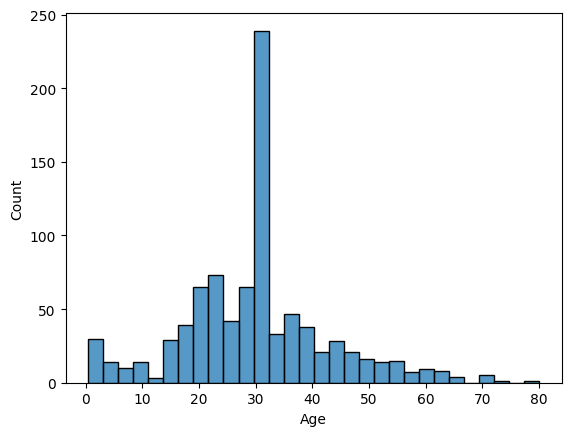

In [34]:
sns.histplot(x='Age',data=df)

<Axes: ylabel='count'>

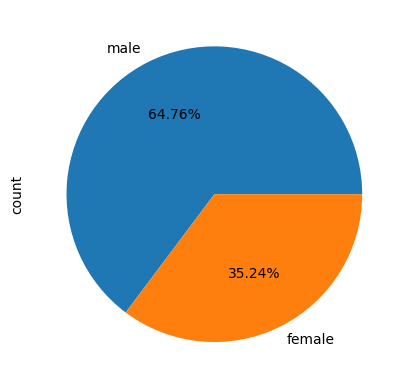

In [35]:
df.Sex.value_counts().plot.pie(autopct='%.2f%%')


<Axes: ylabel='count'>

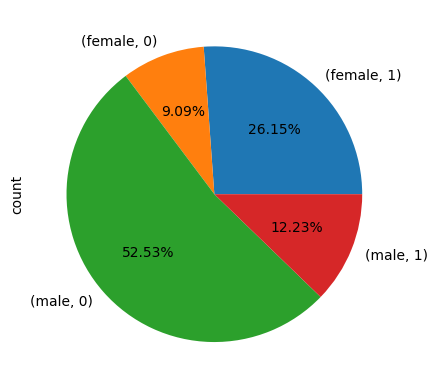

In [36]:
gpsex=df.Survived.groupby(df.Sex).value_counts()
gpsex.plot.pie(autopct='%.2f%%')

# Data Transformation


In [37]:
data=pd.get_dummies(df['Sex'],drop_first=True)
data=data.astype('int64')
data

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [38]:
df=pd.concat([df,data],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,male
0,0,3,male,22.000000,1,0,1
1,1,1,female,38.000000,1,0,0
2,1,3,female,26.000000,0,0,0
3,1,1,female,35.000000,1,0,0
4,0,3,male,35.000000,0,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,1
887,1,1,female,19.000000,0,0,0
888,0,3,female,29.699118,1,2,0
889,1,1,male,26.000000,0,0,1


In [39]:
df.drop('Sex',axis=1,inplace = True )

In [40]:
df.rename(columns={'male':'gender'})


,Survived,Pclass,Age,SibSp,Parch,gender
0,0,3,22.000000,1,0,1
1,1,1,38.000000,1,0,0
2,1,3,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,0,3,35.000000,0,0,1
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,1
887,1,1,19.000000,0,0,0
888,0,3,29.699118,1,2,0
889,1,1,26.000000,0,0,1


# Split features & target


In [41]:
x=df.drop('Survived',axis=1)
y=df.Survived

In [42]:
x.shape,y.shape

((891, 5), (891,))

# Split train & test data


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42,shuffle=True)

# Bulid model


In [44]:
log_reg=LogisticRegression()
rf_clf=RandomForestClassifier()
svc=SVC()
gbc= GradientBoostingClassifier()


In [45]:
def all(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_test=accuracy_score(y_pred,y_test)*100
    accuracy_train=model.score(x_train,y_train)*100
    print('accuracy after train model :',accuracy_train)
    print('accuracy after test  model :',accuracy_test)

In [46]:
all(gbc)

accuracy after train model : 87.07865168539325
accuracy after test  model : 82.12290502793296


In [47]:
all(log_reg)

accuracy after train model : 79.7752808988764
accuracy after test  model : 82.68156424581005


In [48]:
all(svc)

accuracy after train model : 64.8876404494382
accuracy after test  model : 60.893854748603346


In [49]:
all(rf_clf)

accuracy after train model : 91.99438202247191
accuracy after test  model : 82.68156424581005


# Evaluate model


In [50]:
def cm(model):
    y_pred=model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

<Figure size 800x600 with 0 Axes>

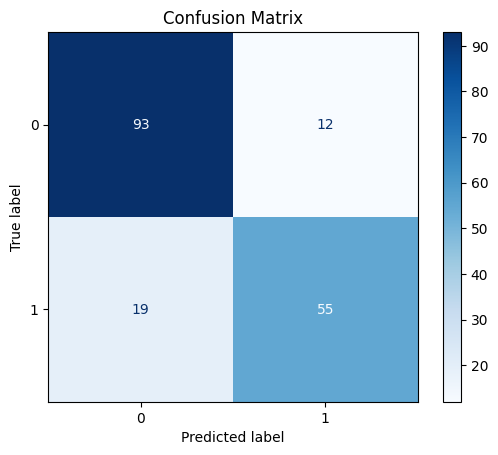

In [51]:
cm(log_reg)

In [52]:
def class_report(model):
    y_pred=model.predict(x_test)
    report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
    print("Classification Report:\n", report)

In [53]:
class_report(log_reg)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.83      0.89      0.86       105
   Malignant       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

